## Creamos un archivo csv con datos sinteticos

In [43]:
import pandas as pd
import numpy as np

# Definimos el número de filas (pasajeros) en el dataset.
num_passengers = 100

# Generamos datos sinteticos
data = {
    'PassengerId': np.arange(1, num_passengers + 1),
    'Survived_status': np.random.randint(0, 2, size=num_passengers),
    'TypeOfClass': np.random.choice(['vip', 'regular'], size=num_passengers),
    'Name': [f'Passenger {i}' for i in range(1, num_passengers + 1)],
    'Sex': np.random.choice(['male', 'female'], size=num_passengers),
    'Age': np.random.randint(18, 80, size=num_passengers),
    'Ticket': ['T' + str(np.random.randint(1000, 9999)) for _ in range(num_passengers)],
    'Cabin': [chr(ord('A') + np.random.randint(0, 26)) for _ in range(num_passengers)]
}

# Creamos un dataframe a partir del dataset
df = pd.DataFrame(data)

# Salvamos el dataframe en un archivo csv
df.to_csv('passenger_dataset.csv', index=False)


## Importamos librerías

In [44]:
# Importamos la librería sklearn para crear el modelo de arboles de decisión y realizar validación de matriz de confusión
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import  train_test_split
from sklearn.metrics import confusion_matrix

# Importamos la librería matplotlib para la visualización del árbol de decisión
from matplotlib import pyplot as plt

# Importamos la librería seaborn
import seaborn as sns

## Obtenemos el dataframe

In [45]:
# Convertimos nuestro archivo .csv en un dataframe. Separamos los campos por medio del caracter ","
df = pd.read_csv('passenger_dataset.csv', sep=",")

# Verificamos nuestro dataframe con el método head()
df.head()

,PassengerId,Survived_status,TypeOfClass,Name,Sex,Age,Ticket,Cabin
0,1,0,vip,Passenger 1,male,52,T8833,N
1,2,0,regular,Passenger 2,male,65,T9155,Z
2,3,1,vip,Passenger 3,male,36,T3797,K
3,4,0,regular,Passenger 4,female,46,T2172,D
4,5,1,regular,Passenger 5,female,77,T1387,X


## Limpiamos  y transformamos nuestro dataframe

In [46]:
# Limpiamos el dataframe debido a que tenemos campos que no son relevantes para el modelo predictivo
df = df.drop(columns=["PassengerId","Name", "Ticket", "Cabin"])

# Usamos la función get_dummies para transformar las variables categoricas en una representación numérica
df = pd.get_dummies(df, columns=['TypeOfClass', 'Sex'], drop_first=True)

# Validamos la transformación de los campos de tipo categorico
print(df)

    Survived_status  Age  TypeOfClass_vip  Sex_male
0                 0   52                1         1
1                 0   65                0         1
2                 1   36                1         1
3                 0   46                0         0
4                 1   77                0         0
..              ...  ...              ...       ...
95                0   21                0         0
96                1   45                0         1
97                0   30                1         0
98                0   42                0         1
99                1   47                0         1

[100 rows x 4 columns]


## Creamos nuestros subconjuntos para el modelo

In [47]:
# Separamos las variables predictoras de la variable objetivo 
X = df.iloc[:, 1:len(df.axes[1])] #TypeOfClass, Sex, Age
Y = df.iloc[:,0:1] # Survived_statud

In [48]:
# Separamos los conjuntos anteriores en entrenamiento y prueba (80-20)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8,random_state=0)

## Creamos y entrenamos nuestro modelo

In [49]:
# Creamos nuestro modelo de regresión lineal
arbol = DecisionTreeClassifier(max_depth=4)

# Aplicamos el modelos al conjunto de entrenamiento
arbol_enfermedad = arbol.fit(X_train, Y_train)

## Visualizamos nuestro árbol de decisión

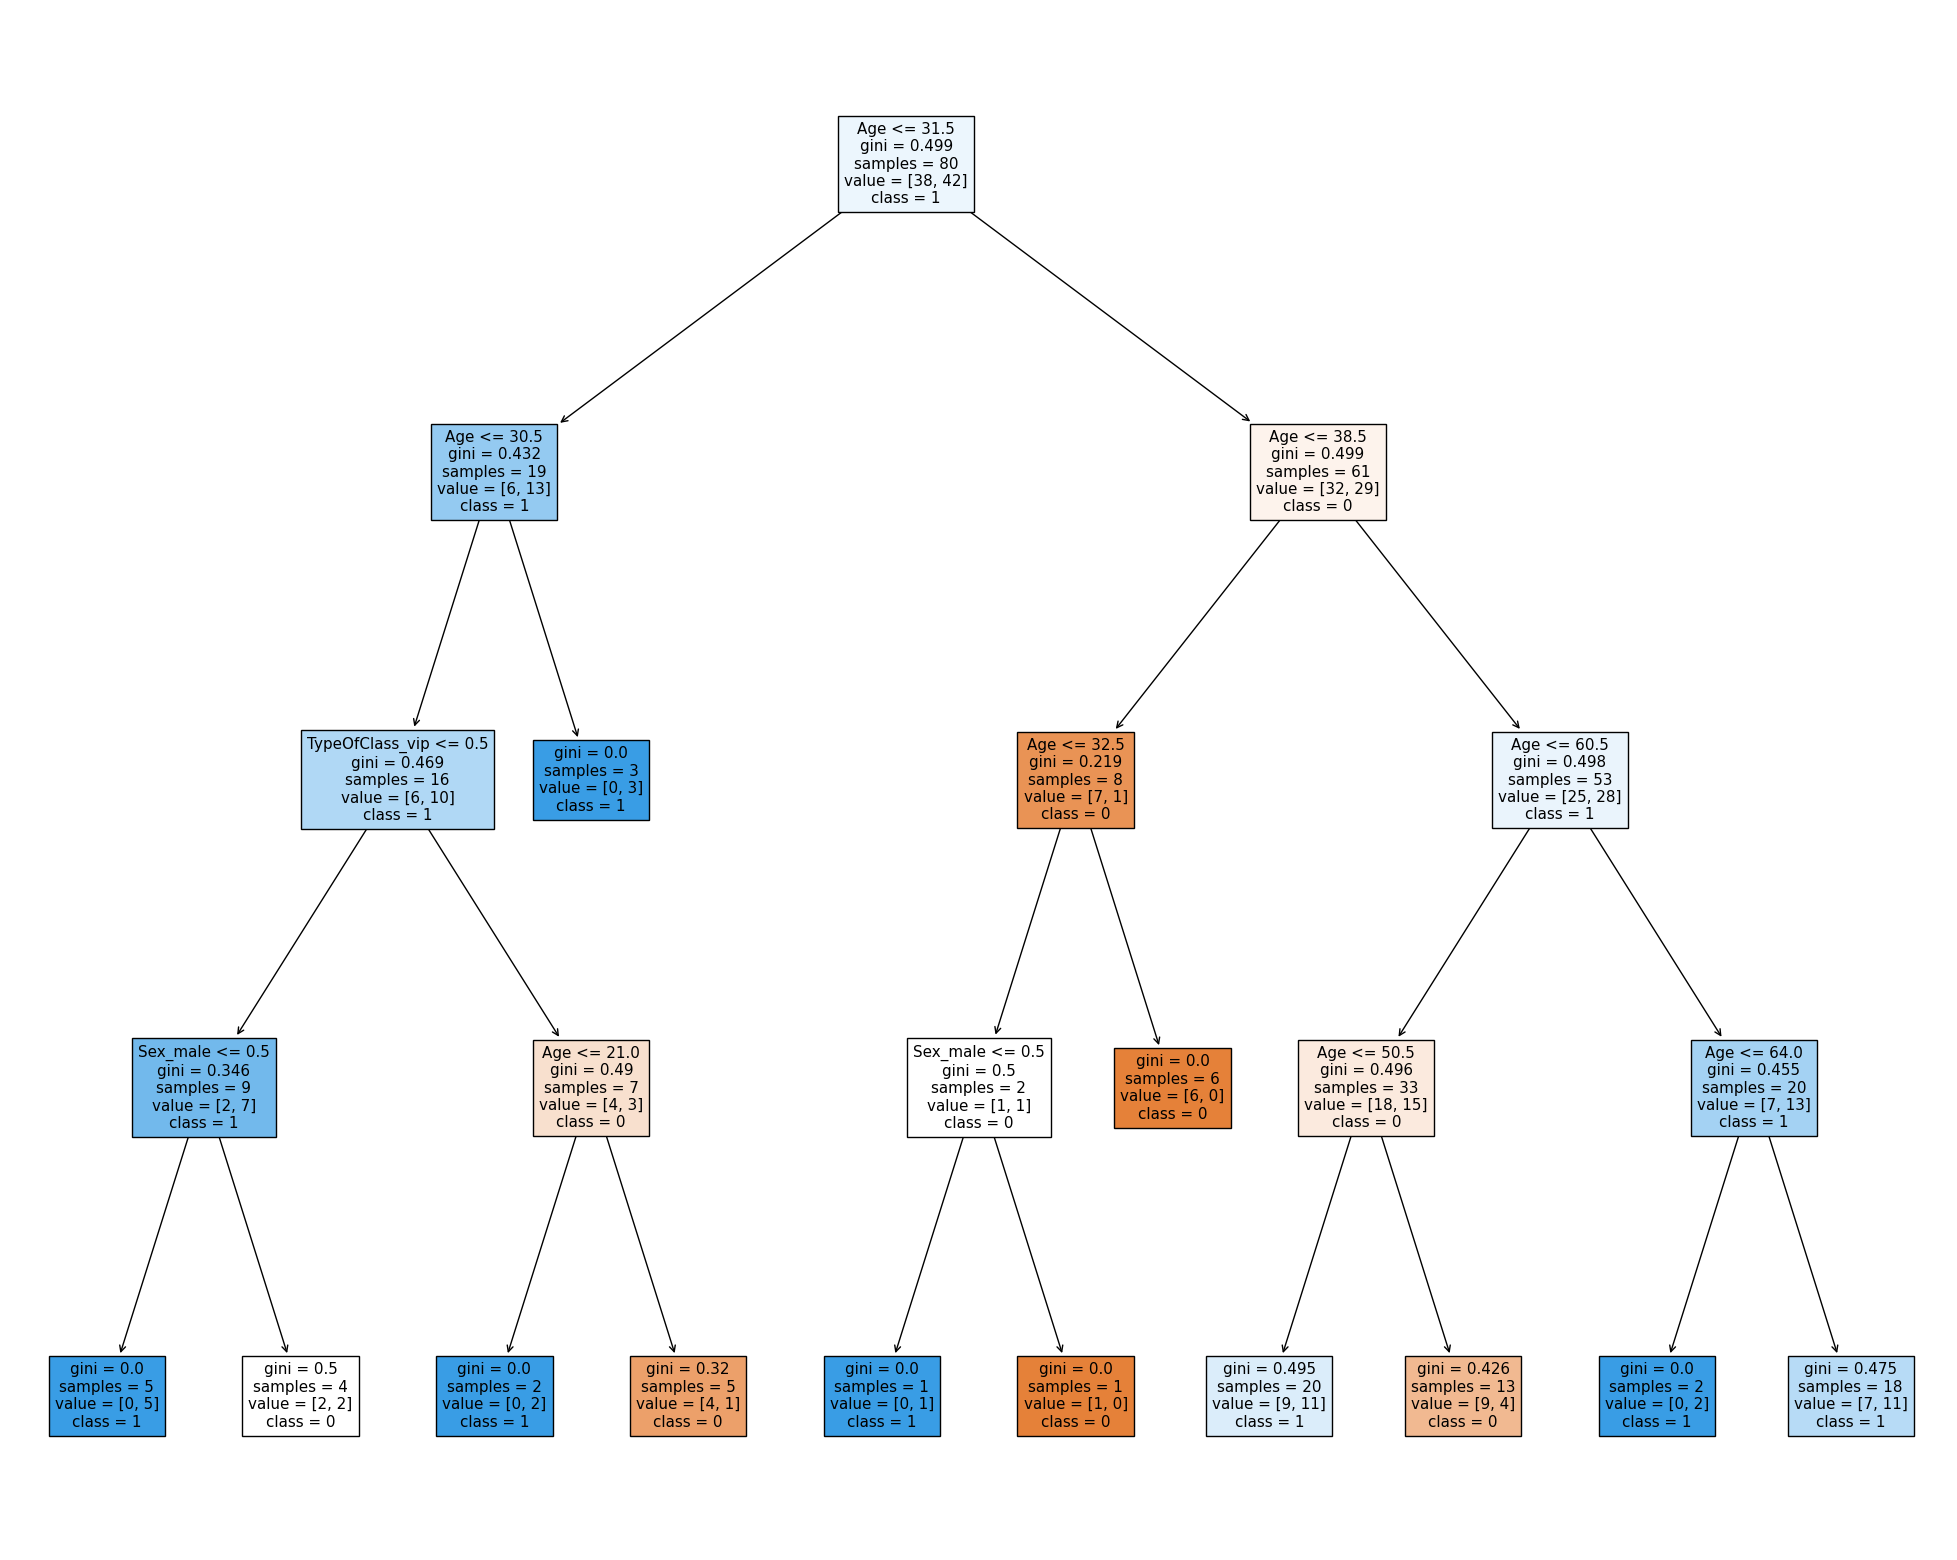

In [50]:
# Obtenemos las clases de nuestra variable objetivo (1: sobrevive, 0: no sobrevive)
unique_class_labels = Y['Survived_status'].unique().tolist()

# Definimos el tamaño de nuestra visualización
fig = plt.figure(figsize=(25,20))

# Construimos nuestro árbol de decisión para ser visualizado
tree.plot_tree(arbol_enfermedad, feature_names=list(X.columns.values),
              class_names=[str(label) for label in unique_class_labels], filled=True)

# Visualizamos nuestro árbol de decisión
plt.show()

## Obtenemos predicciones del modelo

In [51]:
# Realizamos la predicción de nuestro conjunto de entrenamiento
Y_pred = arbol_enfermedad.predict(X_test)
print(Y_pred)

[1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1]


## Validamos nuestro modelo

In [52]:
# Verificamos nuestro modelo a través de una matriz de confusión
matriz_confusion = confusion_matrix(Y_test, Y_pred)
matriz_confusion

array([[4, 9],
       [2, 5]], dtype=int64)

In [53]:
## Validamos la precisión de nuestro modelo (validaciones correctas)
Presicion_Global = np.sum(matriz_confusion.diagonal())/np.sum(matriz_confusion)
print("La precisión de nuestro modelo es de: ", Presicion_Global*100, "%")

La precisión de nuestro modelo es de:  45.0 %


In [54]:
## Validamos la precisión de nuestro modelo (validación correcta de No Sobrevientes)
Presicion_death = matriz_confusion[1,1]/np.sum(matriz_confusion[1,])
print("La precisión de nuestro modelo es de: ", Presicion_death*100, "%")

La precisión de nuestro modelo es de:  71.42857142857143 %


In [55]:
## Validamos la precisión de nuestro modelo (validación correcta de Sobrevientes)
Presicion_alive = matriz_confusion[0,0]/np.sum(matriz_confusion[0,])
print("La precisión de nuestro modelo es de: ", Presicion_alive*100, "%")

La precisión de nuestro modelo es de:  30.76923076923077 %


,Survived_status,Age,TypeOfClass_vip,Sex_male
Survived_status,1.000000,0.072682,-1.793794e-01,-1.800360e-01
Age,0.072682,1.000000,-1.590585e-02,-2.813938e-02
TypeOfClass_vip,-0.179379,-0.015906,1.000000e+00,-3.777782e-17
Sex_male,-0.180036,-0.028139,-3.777782e-17,1.000000e+00


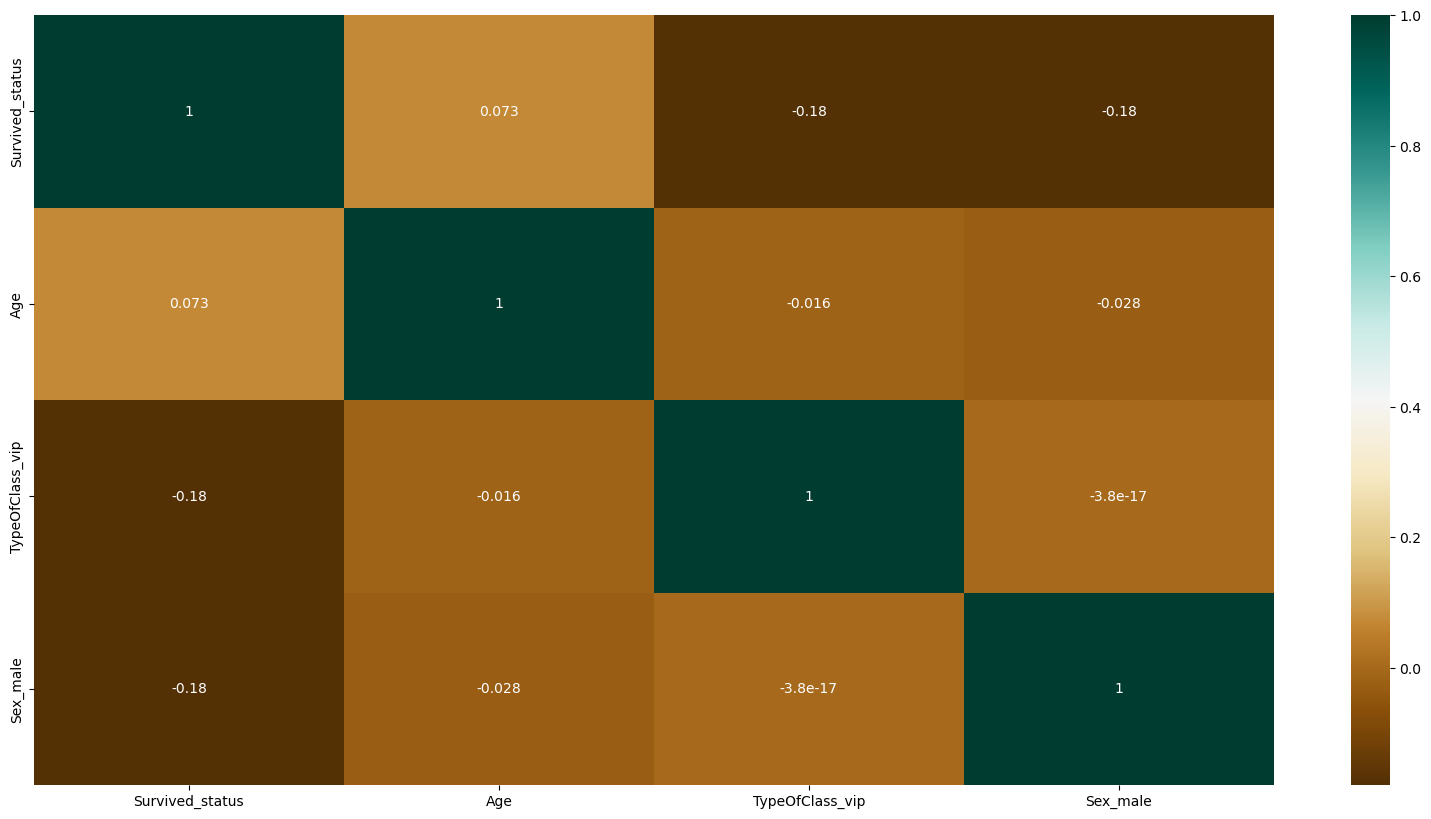

In [56]:
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

En resumen, este mapa de calor confirma que la clase de pasajero (TypeOfClass) y el género (Sex) tienen correlaciones con el estado de supervivencia, mientras que la edad tiene un impacto mínimo. Las correlaciones son más pronunciadas en el caso de la clase de pasajero y el género en relación con la supervivencia.